In [29]:
import pandas as pd
import numpy as np

df_crypto = pd.read_csv('new_cleaned_crypto_data.csv')

df_crypto

,Unnamed: 0,symbol,date,CapMrktEstUSD,PriceUSD,TxCnt,volume_trusted_spot_usd_1d,fng_value,fng_classification,VIX,...,Bullish,Bearish,InvSIX,is_alt,is_meme,is_gp,is_stable,is_btc,is_gold,daily_return
0,0,1INCH,2020-12-26,1.053593e+08,1.619328,27081.0,1.368864e+08,93.0,Extreme Greed,21.53,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,NaN
1,1,1INCH,2020-12-27,7.995606e+07,1.072350,13526.0,1.260869e+08,91.0,Extreme Greed,21.53,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,-0.337781
2,2,1INCH,2020-12-28,7.971789e+07,1.104674,7700.0,5.721160e+07,92.0,Extreme Greed,21.70,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,0.030143
3,3,1INCH,2020-12-29,6.682589e+07,0.893790,7326.0,5.898253e+07,91.0,Extreme Greed,23.08,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,-0.190901
4,4,1INCH,2020-12-30,8.243729e+07,1.101307,6347.0,7.968633e+07,91.0,Extreme Greed,22.77,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,0.232175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300930,306081,ZRX,2025-05-27,2.235229e+08,0.263465,177.0,7.017899e+06,74.0,Greed,18.96,...,0.377049,0.367213,0.009836,1,0,0,0,0,0,0.015444
300931,306082,ZRX,2025-05-28,2.201469e+08,0.259486,300.0,1.007334e+07,71.0,Greed,19.31,...,0.377049,0.367213,0.009836,1,0,0,0,0,0,-0.015103
300932,306083,ZRX,2025-05-29,2.133837e+08,0.251514,149.0,7.935768e+06,74.0,Greed,19.18,...,0.328904,0.418605,-0.089701,1,0,0,0,0,0,-0.030721
300933,306084,ZRX,2025-05-30,1.963716e+08,0.231462,264.0,1.147359e+07,60.0,Greed,18.57,...,0.328904,0.418605,-0.089701,1,0,0,0,0,0,-0.079726


In [30]:
df_crypto.head()

df_crypto['date'] = pd.to_datetime(df_crypto['date'])

# 1. Number of unique symbols
unique_symbols = df_crypto['symbol'].nunique()
print(f"Number of unique symbols: {unique_symbols}")

# 2. Number of symbols for each category
category_cols = ['is_alt', 'is_meme', 'is_gp', 'is_stable', 'is_btc', 'is_gold']
symbols_per_category = {cat: df_crypto[df_crypto[cat] == 1]['symbol'].nunique() for cat in category_cols}
print("\nNumber of symbols per category:")
for k, v in symbols_per_category.items():
    print(f"{k}: {v}")

# 3. Which symbols are in which category
symbols_by_category = {cat: df_crypto[df_crypto[cat] == 1]['symbol'].unique().tolist() for cat in category_cols}
print("\nSymbols in each category:")
for cat, symbols in symbols_by_category.items():
    print(f"{cat}: {symbols}")

# 4. Number of observations for each symbol
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Prevent line wrapping
pd.set_option('display.max_colwidth', None) 

obs_per_symbol = df_crypto['symbol'].value_counts().sort_index()
print("\nNumber of observations for each symbol:")
print(obs_per_symbol)

# 5. Lowest and highest date for each symbol
date_range_per_symbol = df_crypto.groupby('symbol')['date'].agg(['min', 'max'])

 

print("\nDate range for each symbol:")
print(date_range_per_symbol)

date_range_per_symbol.to_csv('date_range_per_symbol.csv')

pd.reset_option('all')


Number of unique symbols: 125

Number of symbols per category:
is_alt: 110
is_meme: 3
is_gp: 2
is_stable: 8
is_btc: 1
is_gold: 1

Symbols in each category:
is_alt: ['1INCH', 'AAVE', 'ADA', 'ALCX', 'ALGO', 'ALPHA', 'ANT', 'API3', 'ATOM', 'AUDIO', 'AVAX', 'BADGER', 'BAL', 'BAT', 'BCH', 'BIT', 'BNB', 'BNT', 'BSV', 'BTG', 'CEL', 'COMP', 'CRO', 'CRV', 'CVC', 'CVX', 'DASH', 'DCR', 'DGB', 'DOT', 'DRGN', 'ELF', 'ENJ', 'ENS', 'EOS', 'ETC', 'ETH', 'FIL', 'FLOW', 'FTT', 'FUN', 'FXS', 'GALA', 'GAS', 'GLM', 'GNO', 'GNT', 'GRIN', 'GRT', 'HEDG', 'HT', 'ICP', 'ICX', 'KNC', 'LDO', 'LEND', 'LINK', 'LOOM', 'LPT', 'LRC', 'LSK', 'LTC', 'LUNA', 'MAID', 'MANA', 'MKR', 'MTL_METAL', 'NEO', 'NMR', 'OGN', 'OMG', 'PAY', 'PERP', 'POLY', 'POWR', 'PPT', 'QASH', 'QNT', 'QTUM', 'REN', 'REP', 'ROOK', 'RSR', 'SAND', 'SKL', 'SNT', 'SNX', 'SOL', 'SRM', 'STORJ', 'SUSHI', 'SWRV', 'TRX', 'UMA', 'UNI', 'VET', 'VTC', 'WAVES', 'WNXM', 'WTC', 'XEM', 'XLM', 'XMR', 'XRP', 'XTZ', 'XVG', 'YFI', 'ZEC', 'ZIL', 'ZRX']
is_meme: ['APE', 

/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/2737780356.py:42: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/2737780356.py:42: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [31]:
df_alt = df_crypto[df_crypto['is_alt'] == 1].copy()

# Make sure date is datetime type
df_alt['date'] = pd.to_datetime(df_alt['date'])

# Sort so that last row per coin is at the end
df_alt = df_alt.sort_values(['symbol', 'date'])

# Get the last observation per altcoin
df_last = df_alt.groupby('symbol').tail(1)
# Compute quantiles
q33 = df_last['CapMrktEstUSD'].quantile(0.33)
q66 = df_last['CapMrktEstUSD'].quantile(0.66)

# Assign groups
def assign_cap_group(mcap):
    if mcap >= q66:
        return 'High'
    elif mcap >= q33:
        return 'Mid'
    else:
        return 'Low'

df_last['cap_group'] = df_last['CapMrktEstUSD'].apply(assign_cap_group)

cap_map = df_last.set_index('symbol')['cap_group'].to_dict()
df_crypto['cap_group'] = df_crypto['symbol'].map(cap_map)

for group in ['High', 'Mid', 'Low']:
    symbols = df_crypto[df_crypto['cap_group'] == group]['symbol'].unique().tolist()
    count = len(symbols)
    print(f"\n{group}:")
    print(f"Number of symbols: {count}")
    print(f"Symbols: {symbols}")

/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/15235569.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last['cap_group'] = df_last['CapMrktEstUSD'].apply(assign_cap_group)



High:
Number of symbols: 36
Symbols: ['AAVE', 'ADA', 'ALGO', 'ATOM', 'AVAX', 'BCH', 'BNB', 'BSV', 'CRO', 'CRV', 'DOT', 'ENS', 'EOS', 'ETC', 'ETH', 'FIL', 'FLOW', 'GALA', 'GRT', 'ICP', 'LDO', 'LINK', 'LTC', 'MANA', 'MKR', 'QNT', 'SAND', 'SOL', 'TRX', 'UNI', 'VET', 'XLM', 'XMR', 'XRP', 'XTZ', 'ZEC']

Mid:
Number of symbols: 34
Symbols: ['1INCH', 'ANT', 'AUDIO', 'BAT', 'COMP', 'CVC', 'CVX', 'DASH', 'DCR', 'DGB', 'ELF', 'ENJ', 'FTT', 'FXS', 'GAS', 'GLM', 'GNO', 'ICX', 'LPT', 'LRC', 'LUNA', 'NEO', 'QTUM', 'RSR', 'SKL', 'SNT', 'SNX', 'SUSHI', 'UMA', 'WAVES', 'XVG', 'YFI', 'ZIL', 'ZRX']

Low:
Number of symbols: 40
Symbols: ['ALCX', 'ALPHA', 'API3', 'BADGER', 'BAL', 'BIT', 'BNT', 'BTG', 'CEL', 'DRGN', 'FUN', 'GNT', 'GRIN', 'HEDG', 'HT', 'KNC', 'LEND', 'LOOM', 'LSK', 'MAID', 'MTL_METAL', 'NMR', 'OGN', 'OMG', 'PAY', 'PERP', 'POLY', 'POWR', 'PPT', 'QASH', 'REN', 'REP', 'ROOK', 'SRM', 'STORJ', 'SWRV', 'VTC', 'WNXM', 'WTC', 'XEM']


In [ ]:
import pandas as pd

dfa = df_crypto.copy()
# Ensure 'date' is datetime
dfa['date'] = pd.to_datetime(dfa['date'])




# --- 2. Label each row with the desired 'group' name ---

def label_group(row):
    if row['symbol'] == 'BTC':
        return 'Bitcoin'
    elif row['is_alt'] == 1:
        if row['cap_group'] == 'High':
            return 'Altcoins (High)'
        elif row['cap_group'] == 'Mid':
            return 'Altcoins (Mid)'
        elif row['cap_group'] == 'Low':
            return 'Altcoins (Low)'
    elif row['is_stable'] == 1:
        return 'Stablecoins'
    elif row['is_gp'] == 1:
        return 'Gold-Pegged'
    elif row['is_meme'] == 1:
        return 'Meme Coins'
    elif row['is_gold'] == 1:
        return 'Gold'
    else:
        return 'Uncategorized'

dfa['group'] = dfa.apply(label_group, axis=1)

# --- 3. Compute start/end dates per symbol under each group ---

symbol_dates = (
    dfa
    .groupby(['group', 'symbol'])['date']
    .agg(min='min', max='max')
    .reset_index()
)

# --- 4. Aggregate at the group level ---

summary = (
    symbol_dates
    .groupby('group')
    .agg(
        start_min=('min', 'min'),
        start_max=('min', 'max'),
        end_min=('max', 'min'),
        end_max=('max', 'max'),
        n_coins=('symbol', 'nunique')
    )
    .reset_index()
)

# --- 5. Reorder rows according to your custom sequence ---

custom_order = [
    'Bitcoin',
    'Altcoins (High)',
    'Altcoins (Mid)',
    'Altcoins (Low)',
    'Stablecoins',
    'Gold-Pegged',
    'Meme Coins',
    'Gold'
]

summary = summary.set_index('group').reindex(custom_order).reset_index()

# --- 6. Build LaTeX table lines ---

latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{lrrrrr}",
    r"\toprule",
    r"Category & Start Date (Min) & Start Date (Max) & End Date (Min) & End Date (Max) & \# Coins \\",
    r"\midrule"
]

for _, row in summary.iterrows():
    line = (
        f"{row['group']} & "
        f"{row['start_min'].date()} & "
        f"{row['start_max'].date()} & "
        f"{row['end_min'].date()} & "
        f"{row['end_max'].date()} & "
        f"{int(row['n_coins'])} \\\\"
    )
    latex_lines.append(line)

latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Start and End dates for each Cryptocurrency Category. Values gathered from CoinMetrics.}",
    r"\label{tab:crypto_return_summary}",
    r"\end{table}"
]

# Save to .tex file
with open("Summary Statistics/new_symbol_summary_table.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")

print("LaTeX table saved to 'new_symbol_summary_table.tex'")



LaTeX table saved to 'new_symbol_summary_table.tex'


In [ ]:
#####LOG DAILY RETURN SUMMARY #############

import pandas as pd

dfb= df_crypto.copy()
dfb['log_daily_return'] =  100 * np.log(dfb['PriceUSD'] / dfb['PriceUSD'].shift(1))


dfb = dfb.dropna(subset=['daily_return'])


# 1. Create group labels
def label_group(row):
    if row['symbol'] == 'BTC':
        return 'Bitcoin'
    elif row['is_alt'] == 1:
        if row['cap_group'] == 'High':
            return 'Altcoins (High)'
        elif row['cap_group'] == 'Mid':
            return 'Altcoins (Mid)'
        elif row['cap_group'] == 'Low':
            return 'Altcoins (Low)'
    elif row['is_stable'] == 1:
        return 'Stablecoins'
    elif row['is_gp'] == 1:
        return 'Gold-Pegged'
    elif row['is_meme'] == 1:
        return 'Meme Coins'
    elif row['is_gold'] == 1:
        return 'Gold'
    else:
        return None

dfb['group'] = dfb.apply(label_group, axis=1)

# 2. Define categories and variables
categories = [
    'Bitcoin',
    'Altcoins (High)',
    'Altcoins (Mid)',
    'Altcoins (Low)',
    'Stablecoins',
    'Gold-Pegged',
    'Meme Coins',
    'Gold'
]

variables = {
    'Daily Return (\%)': 'log_daily_return'
}

scales = {
    'log_daily_return': 1.0
}


# 3. Build LaTeX lines
latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{lrrrrrr}",
    r"\toprule",
    r"Category & Mean & Median & Min & Max & Std Dev & \# Obs \\",
    r"\midrule"
]

for cat in categories:
    subset = dfb[dfb['group'] == cat]
    for i, (var_label, col) in enumerate(variables.items()):
        series = subset[col].dropna() / scales[col]
        mean = series.mean()
        median = series.median()
        vmin = series.min()
        vmax = series.max()
        std = series.std()
        count = series.count()
        stats = [f"{x:.2f}" for x in [mean, median, vmin, vmax, std]]
        prefix = cat if i == 0 else " "
        latex_lines.append(
            f"{prefix} & "
            f"{stats[0]} & {stats[1]} & {stats[2]} & {stats[3]} & {stats[4]} & {int(count)} \\\\"
        )
    latex_lines.append(r"\addlinespace")

latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Summary statistics for each Cryptocurrency Category. Values gathered from CoinMetrics.}",
    r"\label{tab:return_summary}",
    r"\end{table}"
]

with open("Summary Statistics/summaryreturns.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")


<>:49: SyntaxWarning: invalid escape sequence '\%'
<>:49: SyntaxWarning: invalid escape sequence '\%'
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_7140/3675796433.py:49: SyntaxWarning: invalid escape sequence '\%'
  'Daily Return (\%)': 'log_daily_return'


In [ ]:
import pandas as pd

dfb= df_crypto.copy()
dfb['log_daily_return'] =  100 * np.log(dfb['PriceUSD'] / dfb['PriceUSD'].shift(1))


dfb = dfb.dropna(subset=['daily_return'])


# 1. Create group labels
def label_group(row):
    if row['symbol'] == 'BTC':
        return 'Bitcoin'
    elif row['is_alt'] == 1:
        if row['cap_group'] == 'High':
            return 'Altcoins (High)'
        elif row['cap_group'] == 'Mid':
            return 'Altcoins (Mid)'
        elif row['cap_group'] == 'Low':
            return 'Altcoins (Low)'
    elif row['is_stable'] == 1:
        return 'Stablecoins'
    elif row['is_gp'] == 1:
        return 'Gold-Pegged'
    elif row['is_meme'] == 1:
        return 'Meme Coins'
    elif row['is_gold'] == 1:
        return 'Gold'
    else:
        return None

dfb['group'] = dfb.apply(label_group, axis=1)
print(dfb['group'].value_counts())
gp = dfb[dfb['group']=='Gold‑Pegged']['volume_trusted_spot_usd_1d']/1e6
print("raw max:", gp.max())


# 2. Define categories and variables
categories = [
    'Bitcoin',
    'Altcoins (High)',
    'Altcoins (Mid)',
    'Altcoins (Low)',
    'Stablecoins',
    'Gold-Pegged',
    'Meme Coins'
]

variables = {
    'Volume (Million)': 'volume_trusted_spot_usd_1d',
    'Market Cap (Billion)': 'CapMrktEstUSD',
    'N° Transactions (Thousands)': 'TxCnt'
}

scales = {
    'volume_trusted_spot_usd_1d': 1e6,
    'CapMrktEstUSD': 1e9,
    'TxCnt': 1e3
}


# 3. Build LaTeX lines
latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{llrrrrrr}",
    r"\toprule",
    r"Category & Variable & Mean & Median & Min & Max & Std Dev & \# Obs \\",
    r"\midrule"
]

for cat in categories:
    subset = dfb[dfb['group'] == cat]
    for i, (var_label, col) in enumerate(variables.items()):
        series = subset[col].dropna() / scales[col]
        mean = series.mean()
        median = series.median()
        vmin = series.min()
        vmax = series.max()
        std = series.std()
        count = series.count()
        stats = [f"{x:.2f}" for x in [mean, median, vmin, vmax, std]]
        prefix = cat if i == 0 else " "
        latex_lines.append(
            f"{prefix} & {var_label} & "
            f"{stats[0]} & {stats[1]} & {stats[2]} & {stats[3]} & {stats[4]} & {int(count)} \\\\"
        )
    latex_lines.append(r"\addlinespace")

latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Summary statistics for each Cryptocurrency Category. Values gathered from CoinMetrics.}",
    r"\label{tab:crypto_complete_summary}",
    r"\end{table}"
]

with open("Summary Statistics/crypto_complete_summary.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")


group
Altcoins (Low)     94934
Altcoins (High)    85809
Altcoins (Mid)     83228
Stablecoins        18901
Meme Coins          6447
Gold-Pegged         3885
Bitcoin             3803
Gold                3803
Name: count, dtype: int64
raw max: nan


In [ ]:
import pandas as pd

# Assuming df_crypto is already loaded
df_crypto['date'] = pd.to_datetime(df_crypto['date'])

# Use BTC rows (longest series)
btc_df = df_crypto[df_crypto['symbol'] == 'BTC'].copy()

# List of macro/sentiment variables
variables = [
    'fng_value', 'fng_classification', 'VIX', 'ConSIX', 'TwitSIX',
    'UnemRt', 'TotRes', 'IndPro', 'CPIPrc',
    'EPU_DUS',
    #'EPU_MG', 'EPU_MG_ppp', 
    'InvSIX'
]

# Define your panel categories (for grouping only)
panel_map = {
    'fng_value': 'Sentiment',
    'fng_classification': 'Sentiment',
    'TwitSIX': 'Sentiment',
    'InvSIX': 'Sentiment',
    'VIX': 'Sentiment',
    'ConSIX': 'Sentiment',
    'EPU_DUS': 'Uncertainty',
    #'EPU_MG': 'Uncertainty',
    #'EPU_MG_ppp': 'Uncertainty',
    'UnemRt': 'Macro Fundamentals',
    'TotRes': 'Macro Fundamentals',
    'IndPro': 'Macro Fundamentals',
    'CPIPrc': 'Macro Fundamentals',
}

# Build summary info
summary = pd.DataFrame({
    'Variable': variables,
    'Start Date': [
        btc_df.loc[btc_df[var].first_valid_index(), 'date'].date()
        if btc_df[var].first_valid_index() else None
        for var in variables
    ],
    'End Date': [
        btc_df.loc[btc_df[var].last_valid_index(), 'date'].date()
        if btc_df[var].last_valid_index() else None
        for var in variables
    ],
    'Obs': [btc_df[var].notna().sum() for var in variables]
})

# Add Panel for sorting, then drop it before output
summary['Panel'] = summary['Variable'].map(panel_map).fillna('Other')
summary = summary.sort_values(['Panel', 'Variable'])

# Build LaTeX table without a Panel column
latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{lccc}",
    r"\toprule",
    r"Variable & Start Date & End Date & \# Obs \\",
    r"\midrule"
]

for panel in summary['Panel'].unique():
    # panel header spans 4 columns
    latex_lines.append(rf"\multicolumn{{4}}{{l}}{{\textbf{{{panel}}}}} \\")
    panel_df = summary[summary['Panel'] == panel]
    for _, row in panel_df.iterrows():
        line = (
            f"{row['Variable']} & {row['Start Date']} & "
            f"{row['End Date']} & {int(row['Obs'])} \\\\"
        )
        latex_lines.append(line)
    latex_lines.append(r"\addlinespace")

latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Summary of Observations by Category}",
    r"\label{tab:obs_by_category}",
    r"\end{table}"
]

# Write to file
with open("Tables/new_macro_variable_by_category.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")



In [7]:
# adjusting and dropping daily return column when it's nan, it corresponds to extreme values for first observation in log daily return, which is not representative of real asset performance
df_crypto['log_daily_return'] =  100 * np.log(df_crypto['PriceUSD'] / df_crypto['PriceUSD'].shift(1))

df_crypto = df_crypto.dropna(subset=['daily_return'])

df_crypto

,Unnamed: 0,symbol,date,CapMrktEstUSD,PriceUSD,TxCnt,volume_trusted_spot_usd_1d,fng_value,fng_classification,VIX,...,InvSIX,is_alt,is_meme,is_gp,is_stable,is_btc,is_gold,daily_return,category,log_daily_return
1,1,1INCH,2020-12-27,7.995606e+07,1.072350,13526.0,1.260869e+08,91.0,Extreme Greed,21.53,...,0.215768,1,0,0,0,0,0,-0.337781,Altcoins,-41.215862
2,2,1INCH,2020-12-28,7.971789e+07,1.104674,7700.0,5.721160e+07,92.0,Extreme Greed,21.70,...,0.215768,1,0,0,0,0,0,0.030143,Altcoins,2.969772
3,3,1INCH,2020-12-29,6.682589e+07,0.893790,7326.0,5.898253e+07,91.0,Extreme Greed,23.08,...,0.215768,1,0,0,0,0,0,-0.190901,Altcoins,-21.183444
4,4,1INCH,2020-12-30,8.243729e+07,1.101307,6347.0,7.968633e+07,91.0,Extreme Greed,22.77,...,0.215768,1,0,0,0,0,0,0.232175,Altcoins,20.878128
5,5,1INCH,2020-12-31,1.049960e+08,1.365237,5904.0,7.218516e+07,95.0,Extreme Greed,22.75,...,0.192810,1,0,0,0,0,0,0.239652,Altcoins,21.483109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309885,306081,ZRX,2025-05-27,2.235229e+08,0.263465,177.0,7.017899e+06,74.0,Greed,18.96,...,0.009836,1,0,0,0,0,0,0.015444,Altcoins,1.532571
309886,306082,ZRX,2025-05-28,2.201469e+08,0.259486,300.0,1.007334e+07,71.0,Greed,19.31,...,0.009836,1,0,0,0,0,0,-0.015103,Altcoins,-1.521867
309887,306083,ZRX,2025-05-29,2.133837e+08,0.251514,149.0,7.935768e+06,74.0,Greed,19.18,...,-0.089701,1,0,0,0,0,0,-0.030721,Altcoins,-3.120291
309888,306084,ZRX,2025-05-30,1.963716e+08,0.231462,264.0,1.147359e+07,60.0,Greed,18.57,...,-0.089701,1,0,0,0,0,0,-0.079726,Altcoins,-8.308352


In [10]:
group_sorted = group.sort_values('volume_pct', ascending=False)
group_sorted

,Unnamed: 0,symbol,date,CapMrktEstUSD,PriceUSD,TxCnt,volume_trusted_spot_usd_1d,fng_value,fng_classification,VIX,...,is_alt,is_meme,is_gp,is_stable,is_btc,is_gold,daily_return,category,log_daily_return,volume_pct
309097,305293,ZRX,2023-03-31,2.502555e+08,0.295288,1022.0,1.745517e+08,63.0,Greed,18.70,...,1,0,0,0,0,0,0.278221,Altcoins,24.546946,3049.638315
309067,305263,ZRX,2023-03-01,2.574289e+08,0.303752,990.0,1.592422e+08,50.0,Neutral,20.58,...,1,0,0,0,0,0,0.189858,Altcoins,17.383370,2822.956358
309288,305484,ZRX,2023-10-08,1.991906e+07,0.214587,2564.0,5.697225e+07,50.0,Neutral,17.45,...,1,0,0,0,0,0,0.160423,Altcoins,14.878460,2684.980982
308752,304948,ZRX,2022-04-20,8.985516e+08,1.060243,918.0,2.420616e+08,27.0,Fear,20.32,...,1,0,0,0,0,0,0.452251,Altcoins,37.311492,2317.694195
309576,305772,ZRX,2024-07-22,3.168863e+08,0.373909,189.0,2.260752e+08,70.0,Greed,14.91,...,1,0,0,0,0,0,-0.047012,Altcoins,-4.815275,2265.740974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308729,304925,ZRX,2022-03-28,5.950979e+08,0.702184,574.0,6.527600e+07,60.0,Greed,19.63,...,1,0,0,0,0,0,-0.031073,Altcoins,-3.156575,-84.442579
308977,305173,ZRX,2022-12-01,1.629203e+08,0.192237,270.0,4.272899e+06,27.0,Fear,19.84,...,1,0,0,0,0,0,-0.033506,Altcoins,-3.408047,-85.999422
307277,303473,ZRX,2018-04-06,NaN,0.518253,639.0,3.510659e+06,19.0,Extreme Fear,21.49,...,1,0,0,0,0,0,-0.044875,Altcoins,-4.591357,-87.499993
309577,305773,ZRX,2024-07-23,3.153832e+08,0.372135,395.0,7.424585e+06,71.0,Greed,14.72,...,1,0,0,0,0,0,-0.004744,Altcoins,-0.475479,-96.715878


In [ ]:
import pandas as pd

# Use BTC data only
btc_df = df_crypto[df_crypto['symbol'] == 'BTC'].copy()
btc_df['date'] = pd.to_datetime(btc_df['date'])
btc_df.set_index('date', inplace=True)

# Define frequency and panel mappings
frequency_map = {
    'fng_value': 'D',
    'VIX': 'D',
    'ConSIX': 'M',
    'TwitSIX': 'D',
    'UnemRt': 'M',
    'TotRes': 'M',
    'IndPro': 'M',
    'CPIPrc': 'M',
    'EPU_DUS': 'D',
    #'EPU_MG': 'M',
    #'EPU_MG_ppp': 'M',
    'InvSIX': 'W'
}

scaling_map = {
    'TotRes': (1e6, 'TotRes (Millions USD)'),
    'IndPro': (1e12, 'IndPro (Trillions USD)'),
    'UnemRt': (100, 'Unemployment Rate')
}

panel_map = {
    'fng_value': 'Sentiment',
    'TwitSIX': 'Sentiment',
    'InvSIX': 'Sentiment',
    'VIX': 'Sentiment',
    'ConSIX': 'Sentiment',
    'EPU_DUS': 'Uncertainty',
    #'EPU_MG': 'Uncertainty',
    #'EPU_MG_ppp': 'Uncertainty',
    'UnemRt': 'Macro Fundamentals',
    'TotRes': 'Macro Fundamentals',
    'IndPro': 'Macro Fundamentals',
    'CPIPrc': 'Macro Fundamentals'
}

# Prepare summary statistics
stats = []

for var, freq in frequency_map.items():
    series = btc_df[var].dropna()
    if series.empty:
        continue

    true_series = series if freq == 'D' else series.resample(freq).first().dropna()
    scale, label = scaling_map.get(var, (1, var))
    true_series = true_series / scale

    stats.append({
        'Panel': panel_map.get(var, 'Other'),
        'Variable': label,
        'Frequency': freq,
        'Min': true_series.min(),
        'Max': true_series.max(),
        'Mean': true_series.mean(),
        'Median': true_series.median(),
        'Std Dev': true_series.std()
    })

# Convert to DataFrame and sort by panel then variable name
summary_df = pd.DataFrame(stats).sort_values(['Panel', 'Variable'])

# Build LaTeX table
latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{lcrrrrr}",
    r"\toprule",
    r"Variable & Frequency & Mean & Median & Min & Max & Std Dev \\",
    r"\midrule"
]

# Insert rows grouped by panel
for panel in summary_df['Panel'].unique():
    latex_lines.append(rf"\multicolumn{{7}}{{l}}{{\textbf{{{panel}}}}} \\")
    panel_df = summary_df[summary_df['Panel'] == panel]
    for _, row in panel_df.iterrows():
        line = f"{row['Variable']} & {row['Frequency']} & {row['Mean']:.4f} & {row['Median']:.4f} & {row['Min']:.4f} & {row['Max']:.4f} & {row['Std Dev']:.4f} \\\\"
        latex_lines.append(line)
    latex_lines.append(r"\addlinespace")

latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Summary Statistics for Sentiment and Macro Variables (Grouped by Category, Scaled and Frequency-Adjusted)}",
    r"\label{tab:macro_stat_summary}",
    r"\end{table}"
]

# Save to .tex file
with open("Summary Statistics/new_macro_stat_summary.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")

print("LaTeX table with panels and frequencies saved as 'macro_stat_summary.tex'")


/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/3348490198.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  true_series = series if freq == 'D' else series.resample(freq).first().dropna()
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/3348490198.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  true_series = series if freq == 'D' else series.resample(freq).first().dropna()
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/3348490198.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  true_series = series if freq == 'D' else series.resample(freq).first().dropna()
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/3348490198.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  true_series = series if freq

LaTeX table with panels and frequencies saved as 'macro_stat_summary.tex'


## FIGURES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0) GLOBAL STYLE
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
plt.rcParams.update({
    "font.family":       "serif",
    "font.serif":        ["DejaVu Serif"],
    "axes.titlesize":    40,
    "axes.labelsize":    30,
    "axes.titlecolor":   (38/255, 38/255, 38/255),
    "xtick.labelsize":   20,
    "ytick.labelsize":   20,
    "legend.fontsize":   20,
    "axes.titleweight":  "normal",
    "axes.edgecolor":    "black",
    "axes.linewidth":    0.5,
    "grid.color":        "0.85",
    "grid.linestyle":    "-",
    "grid.linewidth":    0.5,
    "figure.dpi":        100,
})

# my two‐color palette
palette = {
    "btc":    "#003b6b",   # deep blue
    "driver": "#740936",   # deep red
}

df_crypto = pd.read_csv('new_cleaned_crypto_data.csv')
df_crypto['date'] = pd.to_datetime(df_crypto['date'])
df_crypto.set_index('date', inplace=True)
df_figures = df_crypto.copy()
df_figures

,Unnamed: 0,symbol,CapMrktEstUSD,PriceUSD,TxCnt,volume_trusted_spot_usd_1d,fng_value,fng_classification,VIX,ConSIX,...,Bullish,Bearish,InvSIX,is_alt,is_meme,is_gp,is_stable,is_btc,is_gold,daily_return
date,,,,,,,,,,,,,,,,,,,,,
2020-12-26,0,1INCH,1.053593e+08,1.619328,27081.0,1.368864e+08,93.0,Extreme Greed,21.53,80.7,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,NaN
2020-12-27,1,1INCH,7.995606e+07,1.072350,13526.0,1.260869e+08,91.0,Extreme Greed,21.53,80.7,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,-0.337781
2020-12-28,2,1INCH,7.971789e+07,1.104674,7700.0,5.721160e+07,92.0,Extreme Greed,21.70,80.7,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,0.030143
2020-12-29,3,1INCH,6.682589e+07,0.893790,7326.0,5.898253e+07,91.0,Extreme Greed,23.08,80.7,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,-0.190901
2020-12-30,4,1INCH,8.243729e+07,1.101307,6347.0,7.968633e+07,91.0,Extreme Greed,22.77,80.7,...,0.435685,0.219917,0.215768,1,0,0,0,0,0,0.232175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,306081,ZRX,2.235229e+08,0.263465,177.0,7.017899e+06,74.0,Greed,18.96,52.2,...,0.377049,0.367213,0.009836,1,0,0,0,0,0,0.015444
2025-05-28,306082,ZRX,2.201469e+08,0.259486,300.0,1.007334e+07,71.0,Greed,19.31,52.2,...,0.377049,0.367213,0.009836,1,0,0,0,0,0,-0.015103
2025-05-29,306083,ZRX,2.133837e+08,0.251514,149.0,7.935768e+06,74.0,Greed,19.18,52.2,...,0.328904,0.418605,-0.089701,1,0,0,0,0,0,-0.030721


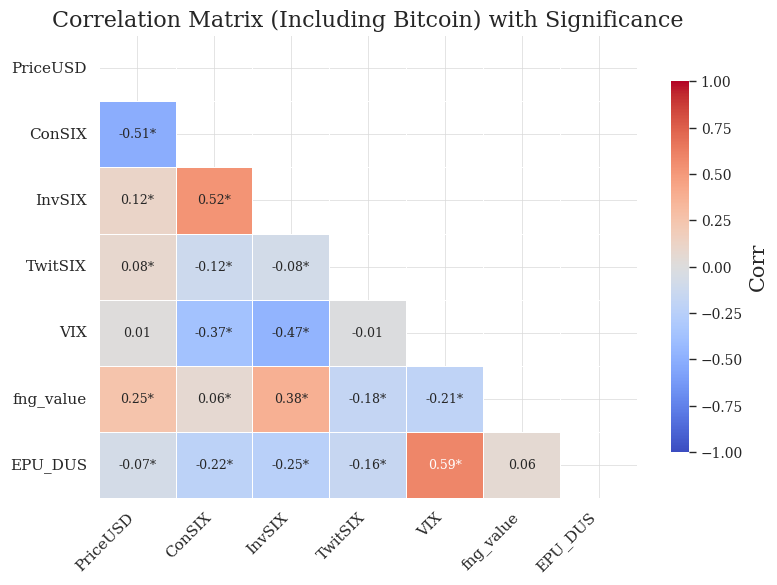

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 0) GLOBAL STYLE
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
plt.rcParams.update({
    "font.family":       "serif",
    "font.serif":        ["DejaVu Serif"],
    "axes.titlesize":    40,
    "axes.labelsize":    15,
    "axes.titlecolor":   (38/255, 38/255, 38/255),
    "xtick.labelsize":   10,
    "ytick.labelsize":   10,
    "legend.fontsize":   10,
    "axes.titleweight":  "normal",
    "axes.edgecolor":    "black",
    "axes.linewidth":    0.5,
    "grid.color":        "0.85",
    "grid.linestyle":    "-",
    "grid.linewidth":    0.5,
    "figure.dpi":        100,
})

# 1) PREP: filter BTC and reset index
df_btc = df_figures.copy().reset_index()
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc = df_btc[df_btc['symbol']=='BTC'].set_index('date')

# 2) SELECT VARIABLES TO CORRELATE
vars_to_corr = [
    'PriceUSD',
    'fng_value',
    'VIX', 'ConSIX', 'InvSIX', 'TwitSIX',
    'EPU_DUS',
    # add/remove here...
]

# 3) DROP NA and compute correlation matrix
df_corr = df_btc[vars_to_corr].dropna()
corr_matrix = df_corr.corr()

# 4) COMPUTE P‑VALUES
p_matrix = pd.DataFrame(
    np.ones(corr_matrix.shape),
    index=corr_matrix.index,
    columns=corr_matrix.columns
)
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i == j:
            p_matrix.loc[i, j] = 0.0
        else:
            _, p = pearsonr(df_corr[i], df_corr[j])
            p_matrix.loc[i, j] = p

# 5) DEFINE VARIABLE CATEGORIES
cat_map = {
    'PriceUSD': 'Price',
    'fng_value': 'Sentiment',
    'VIX':       'Sentiment',
    'ConSIX':    'Sentiment',
    'InvSIX':    'Sentiment',
    'TwitSIX':   'Sentiment',
    'EPU_DUS':   'Uncertainty',
}
group_order = ['Price','Sentiment','Uncertainty']

order_df = pd.DataFrame({
    'var': corr_matrix.columns,
    'category': [cat_map[v] for v in corr_matrix.columns]
})
order_df['category'] = pd.Categorical(
    order_df['category'],
    categories=group_order,
    ordered=True
)
order_df = order_df.sort_values(['category','var'])
sorted_vars = order_df['var'].tolist()

# 6) REINDEX & SLICE
corr_sorted = corr_matrix.loc[sorted_vars, sorted_vars]

# mask upper triangle
mask = np.triu(np.ones(corr_sorted.shape, dtype=bool))

# 7) BUILD ANNOTATION MATRIX
annot = corr_sorted.copy().astype(str)
for i, vi in enumerate(sorted_vars):
    for j, vj in enumerate(sorted_vars):
        if mask[i, j]:
            annot.iloc[i, j] = ""  # leave blank in masked cells
        else:
            val = corr_sorted.loc[vi, vj]
            pval = p_matrix.loc[vi, vj]
            star = "*" if pval < 0.01 else ""
            annot.iloc[i, j] = f"{val:.2f}{star}"

# 8) PLOT HEATMAP WITH CUSTOM ANNOTATIONS
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_sorted,
    mask=mask,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot=annot,
    fmt="",
    annot_kws={'fontsize':9},
    cbar_kws={'shrink':0.8, 'label':'Corr'}
)
plt.title('Correlation Matrix (Including Bitcoin) with Significance', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.savefig('Figures/corr_with_bitcoin_heatmap_signif.png')
plt.show()




/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/1636450386.py:31: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_btc[f'd_{v}'] = df_btc[v].pct_change().dropna()
/var/folders/40/rktqqvhn67376psyzng8whjc0000gn/T/ipykernel_2445/1636450386.py:31: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_btc[f'd_{v}'] = df_btc[v].pct_change().dropna()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4624: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3

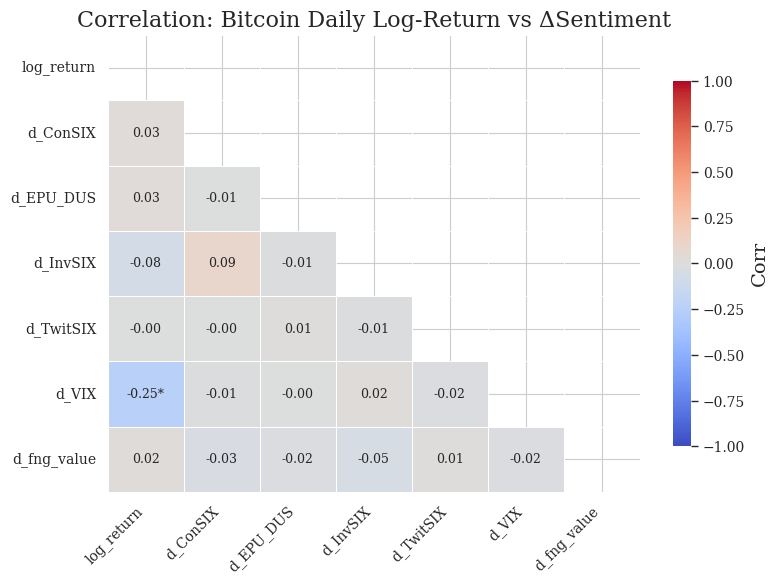

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 0) GLOBAL STYLE
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
plt.rcParams.update({
    "font.family":       "serif",
    "font.serif":        ["DejaVu Serif"],
    "axes.titlesize":    32,
    "axes.labelsize":    14,
    "xtick.labelsize":   10,
    "ytick.labelsize":   10,
    "figure.dpi":        100,
})

# 1) PREP: filter BTC and reset index
df_btc = df_figures.copy().reset_index()
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_btc = df_btc[df_btc['symbol']=='BTC'].set_index('date')

# 2) COMPUTE DAILY LOG RETURN
df_btc['log_return'] = np.log(df_btc['PriceUSD'] / df_btc['PriceUSD'].shift(1)) * 100

# 3) COMPUTE DAILY CHANGES IN SENTIMENT LEVELS
sent_vars = ['fng_value', 'VIX', 'ConSIX', 'InvSIX', 'TwitSIX', 'EPU_DUS']
for v in sent_vars:
    df_btc[f'd_{v}'] = df_btc[v].pct_change().dropna()

# 4) BUILD CORRELATION DATAFRAME
vars_to_corr = ['log_return'] + [f'd_{v}' for v in sent_vars]
df_corr = df_btc[vars_to_corr].dropna()

# 5) COMPUTE CORRELATIONS AND P‑VALUES
corr_matrix = df_corr.corr()
p_matrix = pd.DataFrame(index=corr_matrix.index,
                        columns=corr_matrix.columns,
                        data=np.ones(corr_matrix.shape))
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i == j:
            p_matrix.loc[i, j] = 0.0
        else:
            _, p = pearsonr(df_corr[i], df_corr[j])
            p_matrix.loc[i, j] = p

# 6) SORT VARIABLES (Return first, then Sentiment)
cat_map = {'log_return': 'Return'}
cat_map.update({f'd_{v}': 'Sentiment' for v in sent_vars})
order_df = pd.DataFrame({
    'var': corr_matrix.columns,
    'category': [cat_map[v] for v in corr_matrix.columns]
})
order_df['category'] = pd.Categorical(order_df['category'],
                                      categories=['Return','Sentiment'],
                                      ordered=True)
order_df = order_df.sort_values(['category','var'])
sorted_vars = order_df['var'].tolist()

# 7) SLICE & MASK
corr_sorted = corr_matrix.loc[sorted_vars, sorted_vars]
# mask upper triangle
mask = np.triu(np.ones(corr_sorted.shape, dtype=bool))

# 8) BUILD ANNOTATION MATRIX WITH '*' FOR p<0.01
annot = corr_sorted.copy().astype(str)
for i, vi in enumerate(sorted_vars):
    for j, vj in enumerate(sorted_vars):
        if mask[i, j]:
            annot.iloc[i, j] = ""
        else:
            val = corr_sorted.loc[vi, vj]
            pval = p_matrix.loc[vi, vj]
            annot.iloc[i, j] = f"{val:.2f}{'*' if pval < 0.01 else ''}"

# 9) PLOT HEATMAP WITH CUSTOM ANNOTATIONS
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_sorted,
    mask=mask,
    annot=annot,
    fmt="",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={'fontsize':9},
    cbar_kws={'shrink':0.8, 'label':'Corr'}
)
plt.title('Correlation: Bitcoin Daily Log‑Return vs ΔSentiment', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Figures/logreturn_sentiment_corr_signif.png')
plt.show()


In [74]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0) GLOBAL STYLE
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
plt.rcParams.update({
    "font.family":       "serif",
    "font.serif":        ["DejaVu Serif"],
    "axes.titlesize":    40,
    "axes.labelsize":    30,
    "axes.titlecolor":   (38/255, 38/255, 38/255),
    "xtick.labelsize":   20,
    "ytick.labelsize":   20,
    "legend.fontsize":   20,
    "axes.titleweight":  "normal",
    "axes.edgecolor":    "black",
    "axes.linewidth":    0.5,
    "grid.color":        "0.85",
    "grid.linestyle":    "-",
    "grid.linewidth":    0.5,
    "figure.dpi":        100,
})

# my two‐color palette
palette = {
    "btc":    "#003b6b",   # deep blue
    "driver": "#740936",   # deep red
}

# define NBER 2020 recession dates
recession_start = pd.to_datetime("2020-02-01")
recession_end   = pd.to_datetime("2020-04-30")
recession_color = "#fbe8e3"
recession_alpha = 1

os.makedirs('Figures', exist_ok=True)

df = df_figures.copy().reset_index()
df['date'] = pd.to_datetime(df['date'])
df_btc = df[df['symbol']=='BTC'].set_index('date')
df_btc['log_daily_return'] =  100 * np.log(df_btc['PriceUSD'] / df_btc['PriceUSD'].shift(1))

df_btc = df_btc.dropna(subset=['log_daily_return'])

drivers = ['VIX','EPU_DUS','InvSIX','fng_value','ConSIX', 'TwitSIX']

for x in drivers:
    sub = df_btc[['log_daily_return','volume_trusted_spot_usd_1d','PriceUSD', x]].dropna()
    sub['volume_scaled'] = sub['volume_trusted_spot_usd_1d'] / 1e9

    # 1) scatter
    plt.figure(figsize=(12,8))
    sns.scatterplot(
        x=sub[x], y=sub['log_daily_return'],
        s=25, alpha=0.7,
        color=palette["btc"]
    )
    plt.xlabel(x)
    plt.ylabel("BTC Daily Log-Return (%)")
    plt.title(f"BTC Daily Log-Return vs. {x}")
    plt.tight_layout()
    plt.savefig(f"Figures/new_scatter_return_vs_{x}.png")
    plt.close()

    # 2) volume‐weighted histogram
    plt.figure(figsize=(12,8))
    sns.histplot(
        x=sub[x],
        weights=sub['volume_scaled'],
        bins=30,
        kde=False,
        color=palette["btc"]
    )
    plt.xlabel(x)
    plt.ylabel("Total BTC Volume (billion)")
    plt.title(f"Total BTC Volume by {x} Bins")
    plt.tight_layout()
    plt.savefig(f"Figures/new_hist_volume_by_{x}.png")
    plt.close()

    # 3) normalized time‐series
    ts = sub[['PriceUSD', x]]
    ts_norm = (ts - ts.min()) / (ts.max() - ts.min())

    fig, ax1 = plt.subplots(figsize=(16,8))
    ax2 = ax1.twinx()

    # add shaded recession area
    ax1.axvspan(
        recession_start, recession_end,
        color=recession_color, alpha=recession_alpha
    )
    # ts['PriceUSD'].plot(
    #     ax=ax1,
    #     color=palette["btc"],
    #     linewidth=1.5,
    #     label="BTC Close"
    # )
    # ts[x].plot(
    #     ax=ax2,
    #     color=palette["driver"],
    #     linewidth=1.5,
    #     linestyle="--",
    #     alpha=0.7,
    #     label=x
    # )

    ts_norm['PriceUSD'].plot(
        ax=ax1,
        color=palette["btc"],
        linewidth=1.5,
        label="BTC Close"
    )
    ts_norm[x].plot(
        ax=ax2,
        color=palette["driver"],
        linewidth=1.5,
        linestyle="--",
        alpha=0.7,
        label=x
    )

    ax1.set_ylabel("BTC Close (normalized)")
    ax2.set_ylabel(f"{x} (normalized)")
    ax1.set_title(f"Normalized Time Series: BTC Close & {x}")
    ax1.legend(loc="upper left",  frameon=True)
    ax2.legend(loc="upper right", frameon=True)

    plt.tight_layout()
    plt.savefig(f"Figures/new_timeseries_close_vs_{x}.png")
    plt.close()


In [65]:
# find the single lowest TwitSIX observation
min_date = df_btc['TwitSIX'].idxmin()
min_value = df_btc.loc[min_date, 'TwitSIX']

print(f"Biggest negative spike in TwitSIX occurs on {min_date.date()} with value {min_value}")


Biggest negative spike in TwitSIX occurs on 2022-08-04 with value 0.2625170484828434


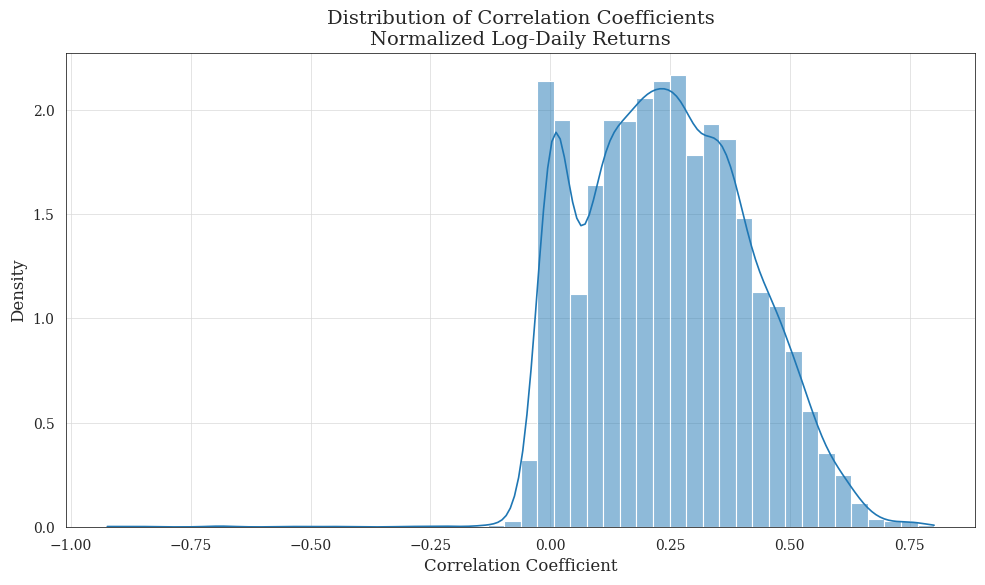

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ——— Prep & compute log‐returns ———
df0 = df_figures.copy().reset_index()   # bring 'date' back as a column
df0['date'] = pd.to_datetime(df0['date'])

# raw log‐daily return (in percent)
df0['log_daily_return'] = 100 * np.log(df0['PriceUSD'] / df0['PriceUSD'].shift(1))
df0 = df0.dropna(subset=['log_daily_return'])

# ——— Pivot to wide form & normalize ———
rets_raw = df0.pivot_table(
    index='date',
    columns='symbol',
    values='log_daily_return',
    aggfunc='first'
)

# gi(t) ≡ (Gi(t) – ⟨Gi⟩)/σi  → zero‐mean, unit‐variance per series
rets = (rets_raw - rets_raw.mean()) / rets_raw.std()

# ——— Compute correlation matrix ———
corr = rets.corr()

# ——— Extract the upper‐triangle off‐diagonal values ———
mask_ut = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_vals = corr.where(mask_ut).stack().values

# ——— Plot the distribution ———
plt.figure(figsize=(10, 6))
sns.histplot(corr_vals, bins=50, kde=True, stat="density")
plt.title('Distribution of Correlation Coefficients\nNormalized Log‑Daily Returns', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.savefig('Figures/corr_distribution_log_daily_return.png')
plt.show()


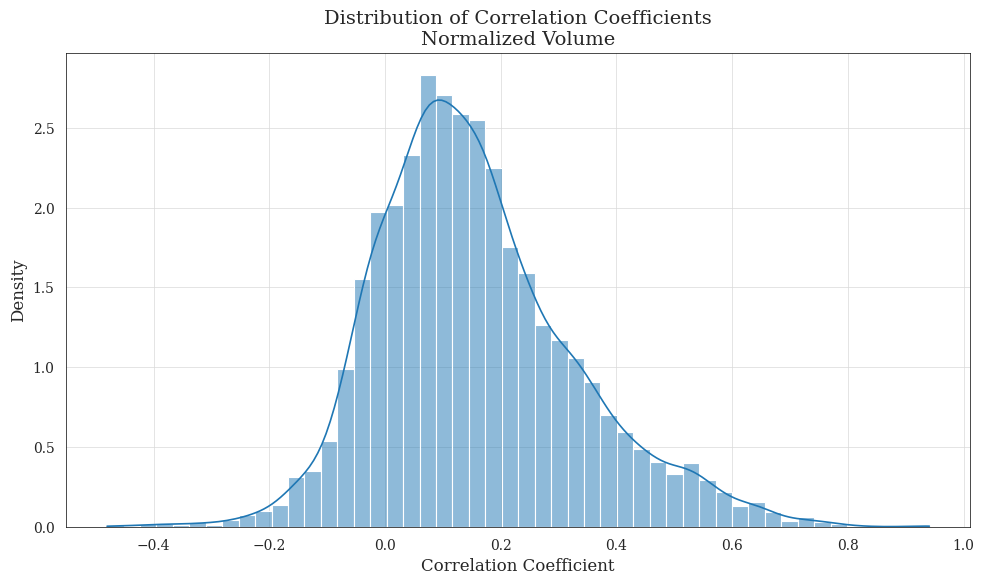

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ——— Prep & clean ———
df0 = df_figures.copy().reset_index()   # bring 'date' back as a column
df0['date'] = pd.to_datetime(df0['date'])

# drop any rows where our volume measure is missing
df0 = df0.dropna(subset=['volume_trusted_spot_usd_1d'])

# ——— Pivot to wide form & normalize ———
vols_raw = df0.pivot_table(
    index='date',
    columns='symbol',
    values='volume_trusted_spot_usd_1d',
    aggfunc='first'
)

# normalize each series to zero‐mean, unit‐variance
vols = (vols_raw - vols_raw.mean()) / vols_raw.std()

# ——— Compute correlation matrix ———
corr_vol = vols.corr()

# ——— Extract the upper‐triangle off‐diagonal values ———
mask_ut = np.triu(np.ones(corr_vol.shape), k=1).astype(bool)
corr_vals_vol = corr_vol.where(mask_ut).stack().values

# ——— Plot the distribution ———
plt.figure(figsize=(10, 6))
sns.histplot(corr_vals_vol, bins=50, kde=True, stat="density")
plt.title('Distribution of Correlation Coefficients\nNormalized Volume', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.savefig('Figures/corr_distribution_volume_trusted_spot_usd_1d.png')
plt.show()


In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("cryptomap.csv")

# Define panel classification logic
def classify_category(primary, secondary):
    primary = str(primary).strip()
    secondary = str(secondary).strip()

    if secondary in ["", "nan", "none"]:
        return primary  # Return the pure primary category
    categories = set([primary, str(secondary).strip()])

    if categories == {"Utility Tokens", "Asset Tokens"}:
        return "Hybrid (U-A)"
    elif categories == {"Utility Tokens", "Payment Tokens"}:
        return "Hybrid (U-P)"
    elif categories == {"Asset Tokens", "Payment Tokens"}:
        return "Hybrid (A-P)"
    else:
        return None



df["Category"] = df.apply(lambda row: classify_category(row["Primary_Category"], row["Secondary_Category"]), axis=1)
df = df[df["Category"].notna()]

# Define one-line descriptions per category (editable)
category_descriptions = {
    "Utility Tokens": "Tokens used to access or interact with a platform’s services or functions.",
    "Asset Tokens": "Tokens representing value claims or financial rights, often tied to revenue or protocol yield.",
    "Payment Tokens": "Tokens primarily used as a medium of exchange or store of value.",
    "Hybrid (U-A)": "Tokens that combine utility functions with claims to protocol-level value or yield.",
    "Hybrid (U-P)": "Tokens that combine payment roles with service-based access or smart contract utility.",
    "Hybrid (A-P)": "Tokens that are used both for payments and represent asset-like characteristics, e.g., stablecoins."
}

# Prepare LaTeX lines
latex_lines = [
    r"\begin{table}[ht]",
    r"\centering",
    r"\scriptsize",
    r"\setlength{\tabcolsep}{4pt}",
    r"\begin{tabular}{p{3cm}p{8cm}p{4cm}}",
    r"\toprule",
    r"\textbf{Category} & \textbf{Ticker} & \textbf{Description} \\",
    r"\midrule"
]

# Control order of rows
ordered_categories = [
    "Utility Tokens", "Asset Tokens", "Payment Tokens",
    "Hybrid (U-A)", "Hybrid (U-P)", "Hybrid (A-P)"
]

# Add one row per category
for cat in ordered_categories:
    sub = df[df["Category"] == cat]
    if not sub.empty:
        tickers = ", ".join(sorted(sub["Symbol"].dropna()))
        description = category_descriptions.get(cat, "")
        latex_lines.append(f"{cat} & {tickers} & {description} \\\\")
        latex_lines.append(r"\addlinespace")

# Close LaTeX table
latex_lines += [
    r"\bottomrule",
    r"\end{tabular}",
    r"\caption{Overview of Cryptocurrency Categories and Their Composition.}",
    r"\label{tab:H2groups}",
    r"\end{table}"
]

# Save LaTeX to file
with open("Summary Statistics/h2groups.tex", "w") as f:
    for line in latex_lines:
        f.write(line + "\n")

print("✅ LaTeX classification table saved to 'Summary Statistics/h2groups.tex'")


✅ LaTeX classification table saved to 'Tables/h2groups.tex'


In [17]:
import pandas as pd

dfa= pd.read_csv("cryptomap.csv")
def classify_category(primary, secondary):
    primary = str(primary).strip()
    secondary = str(secondary).strip()

    if secondary in ["", "nan", "none"]:
        return primary  # Return the pure primary category
    categories = set([primary, str(secondary).strip()])

    if categories == {"Utility Tokens", "Asset Tokens"}:
        return "Hybrid_UA"
    elif categories == {"Utility Tokens", "Payment Tokens"}:
        return "Hybrid_UP"
    elif categories == {"Asset Tokens", "Payment Tokens"}:
        return "Hybrid_AP"
    else:
        return None

# Reads the dfa, analyzes the columns Primary_Category and Secondary_Category. If Primary_Category is "Utility Tokens" and Secondary_Category is "Asset Tokens", it will classify the row as "Hybrid (U-A)". If Primary_Category is "Utility Tokens" and Secondary_Category is "Payment Tokens", it will classify the row as "Hybrid (U-P)". If Primary_Category is "Asset Tokens" and Secondary_Category is "Payment Tokens", it will classify the row as "Hybrid (A-P)". Otherwise, it will keep the original Primary_Category.
dfa['Final_Category'] = dfa.apply(lambda row: classify_category(row['Primary_Category'], row['Secondary_Category']), axis=1)

#update the csv file with the new column
dfa.to_csv("cryptomap.csv", index=False)

In [ ]:
# --- CONFIG ---
CSV_PATH = "Regressions/crypto_regression_summary_VIX.csv"   # change per proxy
OUTPUT_TEX = "Regressions/Summary Statistics/table_VIX.tex"        # where to save LaTeX
SENTINEL_PROXY = "VIX"                            # which proxy this CSV corresponds to
DEC_COEF = 3                                      # decimals for coefficients
DEC_SE   = 3                                      # decimals for std. errors

# --- IMPORTS ---
import pandas as pd
import numpy as np
from pathlib import Path

# --- GROUP MAPPING (from your Table A.1 lists) ---
BTC = {"BTC"}

ALT_HIGH = {
    "AAVE","ADA","ALGO","ATOM","AVAX","BCH","BNB","BSV","CRO","CRV","DOT","ENS","EOS",
    "ETC","ETH","FIL","FLOW","GALA","GRT","ICP","LDO","LINK","LTC","MANA","MKR","QNT",
    "SAND","SOL","TRX","UNI","VET","XLM","XMR","XRP","XTZ","ZEC"
}
ALT_MID = {
    "1INCH","ANT","AUDIO","BAT","COMP","CVC","CVX","DASH","DCR","DGB","ELF","ENJ","FTT",
    "FXS","GAS","GLM","GNO","ICX","LPT","LRC","LUNA","NEO","QTUM","RSR","SKL","SNT",
    "SNX","SUSHI","UMA","WAVES","XVG","YFI","ZIL","ZRX"
}
ALT_LOW = {
    "ALCX","ALPHA","API3","BADGER","BAL","BIT","BNT","BTG","CEL","DRGN","FUN","GNT",
    "GRIN","HEDG","HT","KNC","LEND","LOOM","LSK","MAID","NMR","OGN","OMG","PAY","PERP",
    "POLY","POWR","PPT","QASH","REN","REP","ROOK","SRM","STORJ","SWRV","VTC","WNXM","WTC","XEM"
}
STABLE = {"USDT","USDC","BUSD","DAI","GUSD","HUSD","PAX","TUSD"}
GOLD_PEG = {"PAXG","XAUT"}
MEME = {"DOGE","SHIB","APE"}

GROUP_ORDER = [
    ("Bitcoin", BTC),
    ("Altcoins (High)", ALT_HIGH),
    ("Altcoins (Mid)", ALT_MID),
    ("Altcoins (Low)", ALT_LOW),
    ("Stablecoins", STABLE),
    ("Gold-Pegged", GOLD_PEG),
    ("Meme Coins", MEME),
]

# --- READ CSV ---
df = pd.read_csv(CSV_PATH)

# Harmonize symbol column name
if "symbol" in df.columns:
    df["Symbol"] = df["symbol"]
elif "Symbol" not in df.columns:
    raise ValueError("No 'Symbol' or 'symbol' column in CSV.")

# --- HELPERS: find columns by friendly name ---
def pick_col(prefix, candidates):
    """Return the first existing column for this variable, trying candidate suffixes."""
    for c in candidates:
        col = f"{prefix}_{c}"
        if col in df.columns:
            return col
    return None

# Map the LaTeX row labels to possible CSV suffixes (coef_/stderr_/pval_ prefixes are added later)
ROW_SPECS = [
    ("Intercept",            ["Intercept"]),
    (SENTINEL_PROXY,         [SENTINEL_PROXY, f"log_d_{SENTINEL_PROXY}", f"log_diff_{SENTINEL_PROXY}"]),
    (r"$R_{i,t}$",           ["log_returns_lag1","log_daily_return","lag_return","returns_lag1"]),
    ("Log TxCnt",            ["log_TxCnt","log_diff_TxCnt","log_d_TxCnt"]),
    ("Log Volume",           ["log_volume_trusted_spot_usd_1d","log_diff_volume_trusted_spot_usd_1d","log_d_volume_trusted_spot_usd_1d"]),
    ("Log ActAdrCnt",      ["log_ActAdrCnt","log_diff_ActAdrCnt","log_d_ActAdrCnt"]),
    ("Log UnemRt",           ["log_UnemRt"]),
    ("Log IndPro",           ["log_IndPro"]),
    ("Log CPIPrc",           ["log_CPIPrc"]),
    ("Log TotRes",           ["log_TotRes"]),
]

# Pre-resolve which CSV columns to use for each row
resolved = []
for label, cands in ROW_SPECS:
    coef_col   = pick_col("coef",   cands)
    se_col     = pick_col("stderr", cands)
    pval_col   = pick_col("pval",   cands)
    resolved.append((label, coef_col, se_col, pval_col))

# --- SELECTION RULES ---
def select_by_pval(sub, pval_col, how="median"):
    """Return the Symbol selected by p-value rule."""
    s = sub.dropna(subset=[pval_col]).sort_values(pval_col)
    if s.empty: 
        return None
    if how == "min":
        return s.iloc[0]["Symbol"]
    if how == "median":
        mid = len(s)//2
        return s.iloc[mid]["Symbol"]
    if how == "max":
        return s.iloc[-1]["Symbol"]
    raise ValueError(how)

def pick_representatives(pval_col):
    """Return ordered list of 10 symbols per your spec."""
    chosen = []
    # BTC (only one)
    btc_row = df[df["Symbol"].isin(BTC)]
    if not btc_row.empty:
        chosen.append("BTC")
    else:
        chosen.append(next(iter(BTC)))  # fallback

    # For altcoins: min p-val and median p-val
    for grp in (ALT_HIGH, ALT_MID, ALT_LOW):
        sub = df[df["Symbol"].isin(grp)]
        # If the exact pval_col doesn't exist (e.g., proxy name mismatch), try to find it
        if pval_col not in sub.columns:
            # try the resolved mapping row for the proxy (already matched above)
            pcol_guess = pick_col("pval", [SENTINEL_PROXY, f"log_d_{SENTINEL_PROXY}", f"log_diff_{SENTINEL_PROXY}"])
            if pcol_guess:
                pval_col_use = pcol_guess
            else:
                # cannot select properly: just pick two medians by alphabet to keep deterministic
                syms = sorted(sub["Symbol"].tolist())
                chosen += syms[:2] if len(syms) >= 2 else syms
                continue
        else:
            pval_col_use = pval_col

        # min + median
        s_min = select_by_pval(sub, pval_col_use, "min")
        s_med = select_by_pval(sub, pval_col_use, "median")
        # ensure distinct if only one asset or duplicates
        picks = []
        if s_min: picks.append(s_min)
        if s_med and s_med not in picks: picks.append(s_med)
        # pad deterministically if needed
        if len(picks) < 2:
            pool = [x for x in sorted(sub["Symbol"]) if x not in picks]
            while len(picks) < 2 and pool:
                picks.append(pool.pop(0))
        chosen += picks[:2]

    # For Stable, Gold-Pegged, Meme: median p-val
    for grp in (STABLE, GOLD_PEG, MEME):
        sub = df[df["Symbol"].isin(grp)]
        pcol_use = pval_col if pval_col in sub.columns else pick_col("pval", [SENTINEL_PROXY, f"log_d_{SENTINEL_PROXY}", f"log_diff_{SENTINEL_PROXY}"])
        if pcol_use:
            pick = select_by_pval(sub, pcol_use, "median")
        else:
            pick = sorted(sub["Symbol"]).pop(len(sub)//2) if not sub.empty else None
        if pick: chosen.append(pick)

    # Sanity: ensure 10 columns total (BTC + 9)
    return chosen[:10]

# Find the p-value column for the sentiment proxy
SENT_PVAL_COL = pick_col("pval", [SENTINEL_PROXY, f"log_d_{SENTINEL_PROXY}", f"log_diff_{SENTINEL_PROXY}"])
if SENT_PVAL_COL is None:
    raise ValueError(f"Could not find p-value column for proxy '{SENTINEL_PROXY}' in CSV.")

COL_SYMBOLS = pick_representatives(SENT_PVAL_COL)

# --- FORMATTING ---
def starify(p):
    if pd.isna(p): return ""
    return "**" if p < 0.01 else ("*" if p < 0.05 else "")

def fmt(x, d=3):
    return "" if pd.isna(x) else f"{x:.{d}f}"

# --- BUILD LATEX LINES (your skeleton) ---
latex = []
latex += [
    r"\begin{table}[ht]",
    r"\centering",
    r"\renewcommand{\arraystretch}{1.15}",
    r"\resizebox{\textwidth}{!}{%",
    r"\scriptsize",
    r"\begin{tabular}{l *{10}{c}}",
    r"\toprule",
    r"\multicolumn{10}{c}{Specification tested: $R_{i,t+1} = \alpha_i + \beta_{sent} S_t + \phi R_{i,t} + \theta B_{i,t} + \gamma M_t + \varepsilon_{i,t+1}$}\\",
    r"\addlinespace",
    " & " + " & ".join(COL_SYMBOLS) + r" \\",
    r"\midrule"
]

# function to add a row of coefficients + row of SEs (parentheses)
def add_var_rows(label, coef_col, se_col, pval_col):
    # coefficients with stars
    coeffs = []
    ses    = []
    for sym in COL_SYMBOLS:
        row = df[df["Symbol"] == sym]
        if coef_col and coef_col in df.columns:
            c = row[coef_col].iloc[0] if not row.empty else np.nan
            p = (row[pval_col].iloc[0] if (pval_col and pval_col in df.columns and not row.empty) else np.nan)
            coeffs.append(f"{fmt(c, DEC_COEF)}{starify(p)}")
        else:
            coeffs.append("")
        if se_col and se_col in df.columns:
            s = row[se_col].iloc[0] if not row.empty else np.nan
            ses.append(f"({fmt(s, DEC_SE)})")
        else:
            ses.append("()")

    latex.append(f"{label}")
    latex.append("  & " + " & ".join(coeffs) + r" \\")
    latex.append("  & " + " & ".join(ses)    + r" \\")
    latex.append("")

# Add rows for each variable per resolved mapping
for label, coef_col, se_col, pval_col in resolved:
    add_var_rows(label, coef_col, se_col, pval_col)

# Bottom-panel metrics
def get_metric(sym, colname):
    row = df[df["Symbol"] == sym]
    return "" if row.empty or colname not in df.columns else fmt(row[colname].iloc[0], 3)

metric_rows = [
    ("N",            "n"),
    ("Durbin-Watson","dw"),
    ("F-stat",       "fstat"),
    (r"\(R^2\)",     "r2"),
    (r"Adj.\ \(R^2\)","adj_r2"),
]
for label, col in metric_rows:
    vals = [get_metric(sym, col) for sym in COL_SYMBOLS]
    latex.append(r"\midrule" if label=="N" else "")
    latex.append(f"{label} & " + " & ".join(vals) + r" \\")
latex.append(r"\bottomrule")
latex.append(r"\end{tabular}")
latex.append(r"}")
latex.append(rf"\vspace{{1ex}}")
latex.append(rf"\caption{{\textbf{{Estimation Results from Predictive Regressions - {SENTINEL_PROXY}}} \\")
latex.append(r"This table presents coefficient estimates and Newey--West standard errors (in parentheses) from predictive regressions of next-day returns on the selected proxy for investor sentiment. The regression specification is reported at the top of the table. Each column corresponds to a selected cryptocurrency, chosen to represent the full range of categories in the sample: Bitcoin (BTC), two high-cap altcoins, two mid-cap altcoins, two low-cap altcoins, one stablecoin, one gold-pegged token, and one meme coin. Each regression is estimated separately using the available time series data for the respective cryptocurrency and the sentiment proxy. The dependent variable is the next-day log return. Standard errors are computed using the Newey--West estimator with automatic lag selection. Statistical significance is denoted as follows: *$p<0.05$, **$p<0.01$.}")
latex.append(r"\label{tab:vix_result_h1}")
latex.append(r"\end{table}")

# --- SAVE ---
Path(OUTPUT_TEX).parent.mkdir(parents=True, exist_ok=True)
with open(OUTPUT_TEX, "w") as f:
    f.write("\n".join(latex))

print(f"✅ Wrote LaTeX table with Newey–West S.E. to: {OUTPUT_TEX}")
print("Columns shown:", COL_SYMBOLS)

✅ Wrote LaTeX table with Newey–West S.E. to: Regressions/Tables/table_VIX.tex
Columns shown: ['BTC', 'SOL', 'ALGO', 'LPT', 'SUSHI', 'WNXM', 'LSK', 'TUSD', 'PAXG', 'SHIB']
